# Análisis de datos y predicción de valoraciones de aplicaciones en Google Play Store

**Aplicación :** El nombre de la aplicación

**Categoría :** La categoría de la aplicación

**Calificación :** La calificación de la aplicación en Play Store

**Reseñas :** El número de reseñas de la aplicación

**Tamaño :** El tamaño de la aplicación

**Instalación :** Número de instalaciones de la aplicación

**Tipo :** El tipo de aplicación (Gratuita/Pagada)

**Precio :** El precio de la aplicación (0 si es gratuita)

**Clasificación del contenido :** El público objetivo de la aplicación

**Géneros:** El género de la aplicación

**Última actualización :** Fecha de la última actualización de la aplicación

**Ver :** La versión actual de la aplicación

**Versión Android :** La versión mínima de Android necesaria para ejecutar la aplicación

## Paso 1

### Importar Librerias Necesarias

Incluye bibliotecas para la manipulación de datos, visualización de datos, y otros basados en las necesidades específicas del proyecto

In [1]:
# Data
import numpy as np
import pandas as pd
from collections import defaultdict

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from wordcloud import WordCloud

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# Hide warnings
import warnings
warnings.filterwarnings('ignore')


### 1.2 Cargar Dataset en un pandas Dataframe

Esto permitira facilitar el Analisis

In [2]:
df = pd.read_csv("googleplaystore.csv")

## 2. Analisis de Datos Inicial

A continuación, voy a conocer a fondo el conjunto de datos antes de pasar a las etapas de limpieza y transformación de datos. Ya que no necesariamente los datos vendran transformados y normalizados para pasarlo al modelo de regresion lineal

<a id="overview"></a>
# <b><span style='color:#fcc36d'>Step 2.1 |</span><span style='color:#ff6200'> Dataset Overview</span></b>

Entonces, comenzaremos visualizando los datos

In [3]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3634,Free live weather on screen,WEATHER,4.4,15370,21M,"1,000,000+",Free,0,Everyone,Weather,"August 2, 2018",12.2.6.3660,4.1 and up
5073,PhotoScan by Google Photos,PHOTOGRAPHY,4.3,61990,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"February 9, 2018",1.5.1.182070924,5.0 and up
5153,Prestige AH,MEDICAL,4.0,2,29M,100+,Free,0,Everyone,Medical,"May 11, 2017",300000.0.81,4.0.3 and up
9815,ES Solar,BUSINESS,5.0,3,4.7M,100+,Free,0,Everyone,Business,"May 17, 2018",1.2,4.1 and up
4569,S Player - Lightest and Most Powerful Video Pl...,TOOLS,4.6,14224,7.1M,"1,000,000+",Free,0,Everyone,Tools,"October 12, 2017",1.0.98_ww,2.3 and up


In [4]:
df.shape

(10841, 13)

**Como podemos ver tenemos 10841 datos que constan de 13 atributos.**

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Aqui podemos apreciar como solamente la columna **Rating** esta en formato float, por lo que se debera transformar todas las otras columnas que vayamos a ocupar en valores flotantes

## 3. Procesamiento

**Como la mayoría de las características son de tipo objeto y tienen sufijos, el tipo de datos de cada característica debe convertirse a un formato adecuado para el análisis.**

###  3.1 Comprobamos si todos los valores en Reviews son numéricas


In [8]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
df=df.drop(df.index[10472])

**Convertimos Reviews a tipo entero**

In [10]:
df["Reviews"] = df["Reviews"].astype(int)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


### 3.2 Tamaño (Size)

**Se puede ver que los datos tienen prefijos métricos (kilo y Mega) junto con al numero. Deberemos sustituir k y M para convertir los valores numéricos.**

**La característica Tamaño debe ser de tipo flotante.**

**El sufijo, que es una unidad de tamaño, debe ser eliminado. \ Ejemplo: '19.2M' a 19.2**

**Si el tamaño es «Varía según el dispositivo», se sustituye por 0. Ya que no aportara al analisis**

**Los valores flotantes convertidos de Tamaño se representan en unidades de megabytes.**


In [12]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

**Removemos todos los caracteres para luego convertirlos a flotantes, Si es M -> 000, Si es K -> ´´**



In [13]:
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
#apps['size']=apps['size'].str.replace('.','')
df['Size']=df['Size'].replace("Varies with device",np.nan)
df['Size']=df['Size'].astype('float')
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

**Algunas aplicaciones tienen un tamaño en megabytes y otras en kilobytes. Entonces deberemos Convertir mega a kilo y luego convertir todo a mega**

In [14]:
for i in df['Size']:
    if i < 10:
        df['Size']=df['Size'].replace(i,i*1000)
df['Size']=df['Size']/1000
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


## 3.3 Instalaciones y Precio 

**Los valores de Install deben ser de tipo entero, por lo cual deben eliminarse los caracteres ',' y '+'. \ Ejemplo: '10.000+' a 10000**

In [16]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [17]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [18]:
remover_items=['+',',','$']
columnas=['Installs','Price']
for item in remover_items:
    for col in columnas:
        df[col]=df[col].str.replace(item,'')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
df.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [20]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

**Ahora convierto los valores de Installs a entero y Precio a Float**

In [21]:
df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


## 3.4 Ultima Actualizacion (Last Update)

**Deberemos transformar de String a pandas Data Time, y luego separar en 3 columnas: Año, mes, dia (actualizado)**

In [22]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [23]:
df['Updated_Month']=df['Last Updated'].dt.month
df['Updated_Year']=df['Last Updated'].dt.year

In [24]:
df.drop('Last Updated', axis=1, inplace=True)

In [25]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int32  
 13  Updated_Year    10840 non-null  int32  
dtypes: float64(3), int32(4), object(7)
memory usage: 1.1+ MB


## 4 Limpieza de datos

In [27]:
null = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Price,0,0.000000


<BarContainer object of 14 artists>

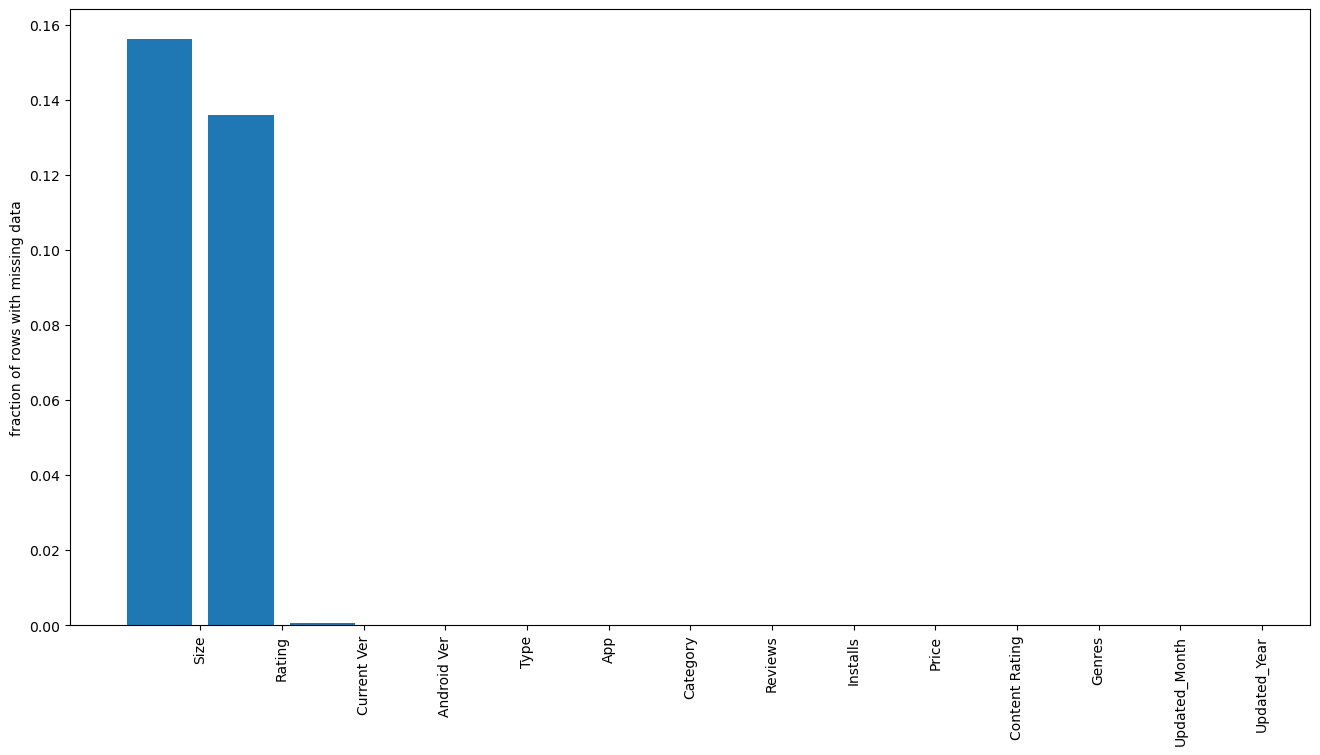

In [28]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

**Está claro que nos faltan valores en Rating, Type, Content Rating, Current Ver y Android Ver.**

### 4.1Tratamiento de los valores omitidos

**Limpio los valores faltantes usando Imputación de Valores Aleatorios porque es la mejor manera de mantener la distribución de cada característica.**

In [29]:
def impute_median(series):
    return series.fillna(0)

df['Rating'] = df['Rating'].transform(impute_median)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int32  
 13  Updated_Year    10840 non-null  int32  
dtypes: float64(3), int32(4), object(7)
memory usage: 1.1+ MB


In [31]:
def impute_median(series):
    return series.fillna(0)

df['Size'] = df['Size'].transform(impute_median)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int32  
 13  Updated_Year    10840 non-null  int32  
dtypes: float64(3), int32(4), object(7)
memory usage: 1.1+ MB


In [33]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
Updated_Month     0
Updated_Year      0
dtype: int64

In [34]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)

In [35]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
Updated_Month     0
Updated_Year      0
dtype: int64

**Eliminacion de Datos duplicados**

In [36]:
duplicate = df.duplicated()
print(duplicate.sum())

484


In [37]:
df.drop_duplicates(inplace=True)

In [38]:
duplicate = df.duplicated()
print(duplicate.sum())

0


**Extraer características numéricas y categóricas**

In [39]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated_Month',
 'Updated_Year']

In [40]:
cat_features=[col for col in df.columns if df[col].dtype=='O']
cat_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

### Buscamos posibles outlayers

<Axes: >

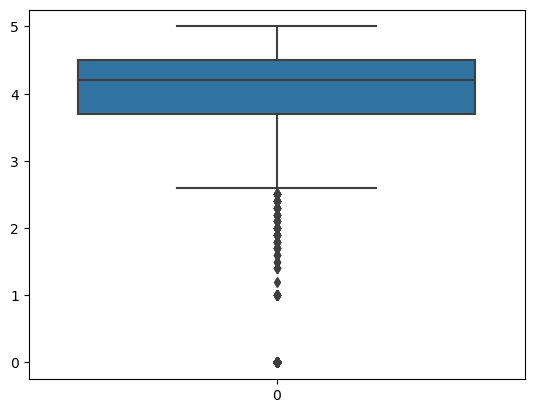

In [41]:
sns.boxplot(df["Rating"])

<Axes: >

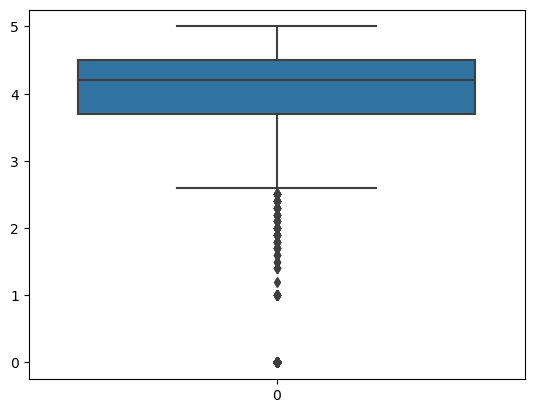

In [42]:
sns.boxplot(df["Rating"])

<Axes: >

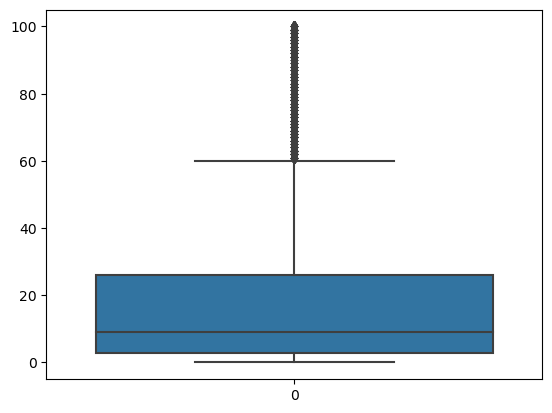

In [43]:
sns.boxplot(df["Size"])

<Axes: >

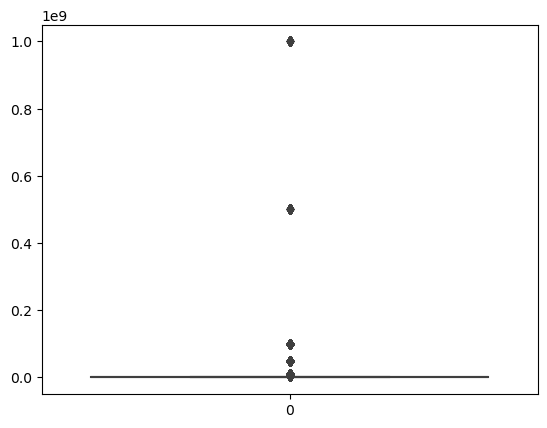

In [44]:
sns.boxplot(df["Installs"])

<Axes: >

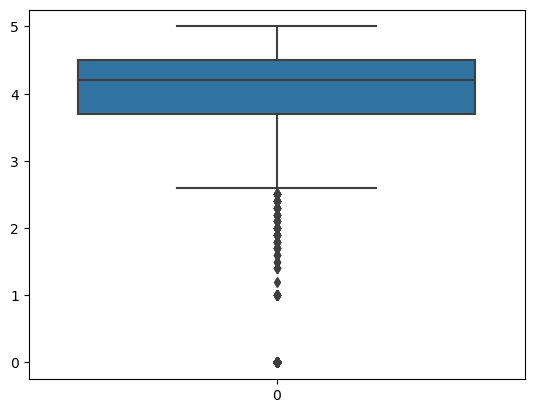

In [45]:
sns.boxplot(df["Rating"])

<Axes: >

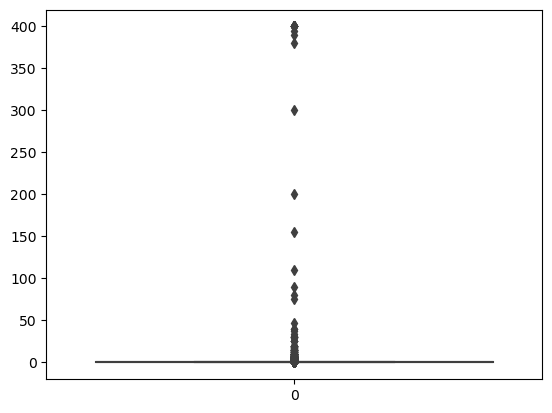

In [46]:
sns.boxplot(df["Price"])

## 5. Análisis exploratorio de datos (AED)

**Columna "Category"**

In [47]:
df['Category'].value_counts()

Category
FAMILY                 1943
GAME                   1121
TOOLS                   842
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

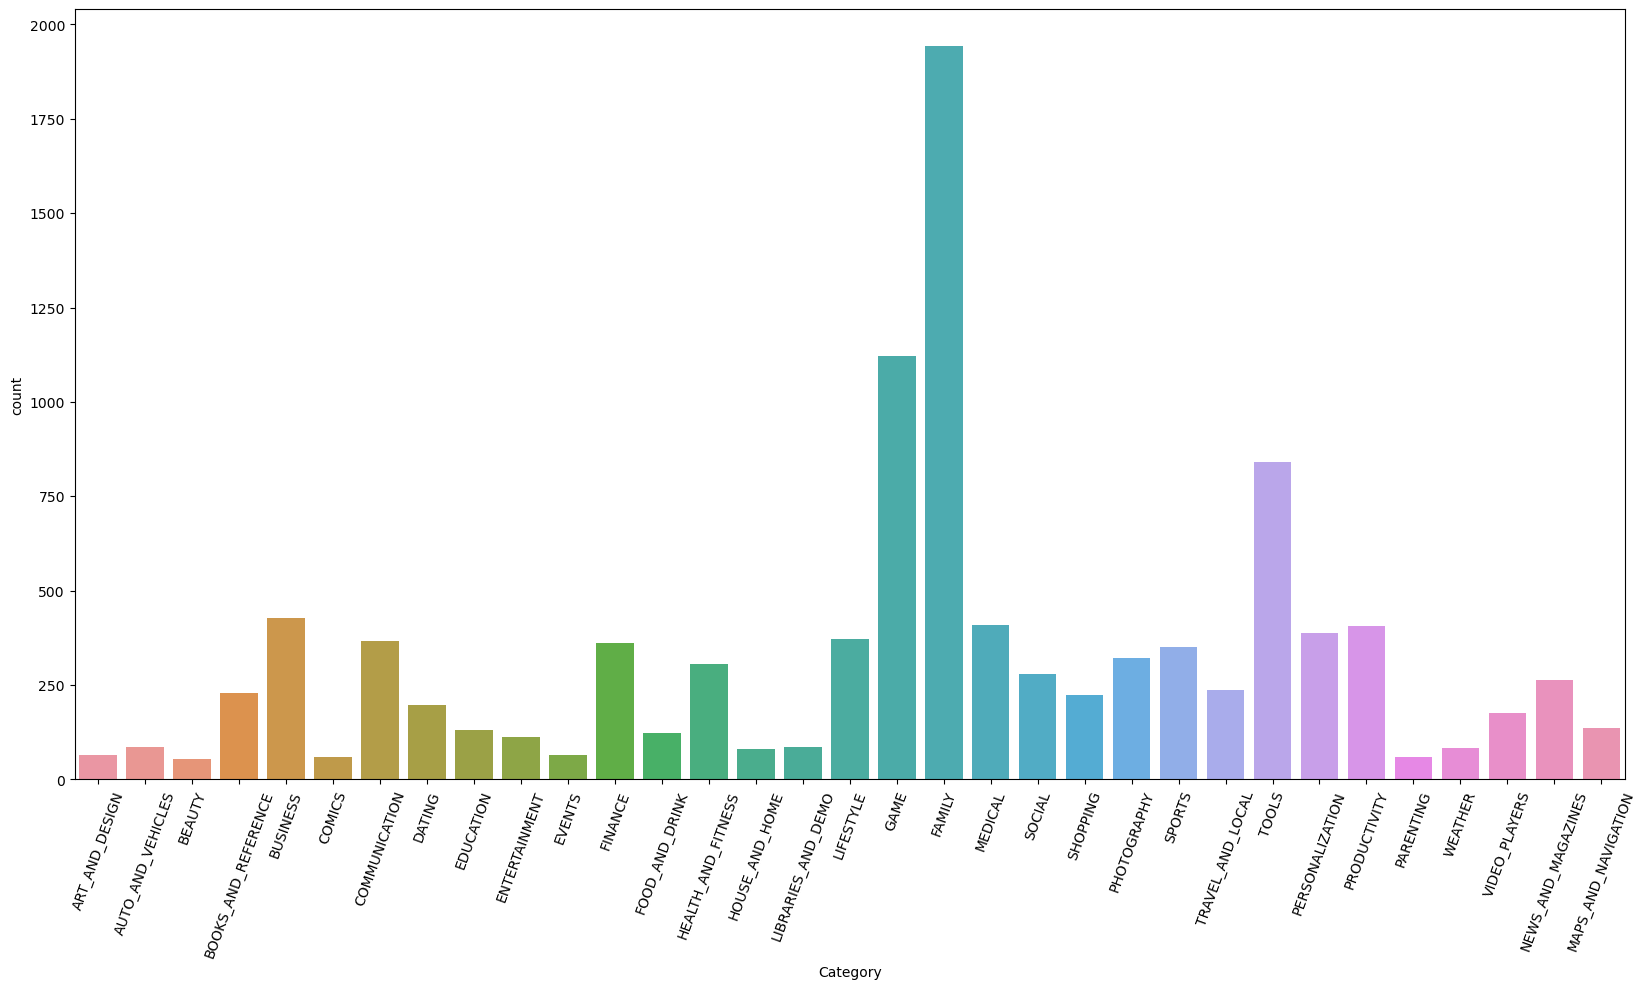

In [48]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Category',data=df)
plt.xticks(rotation=70)

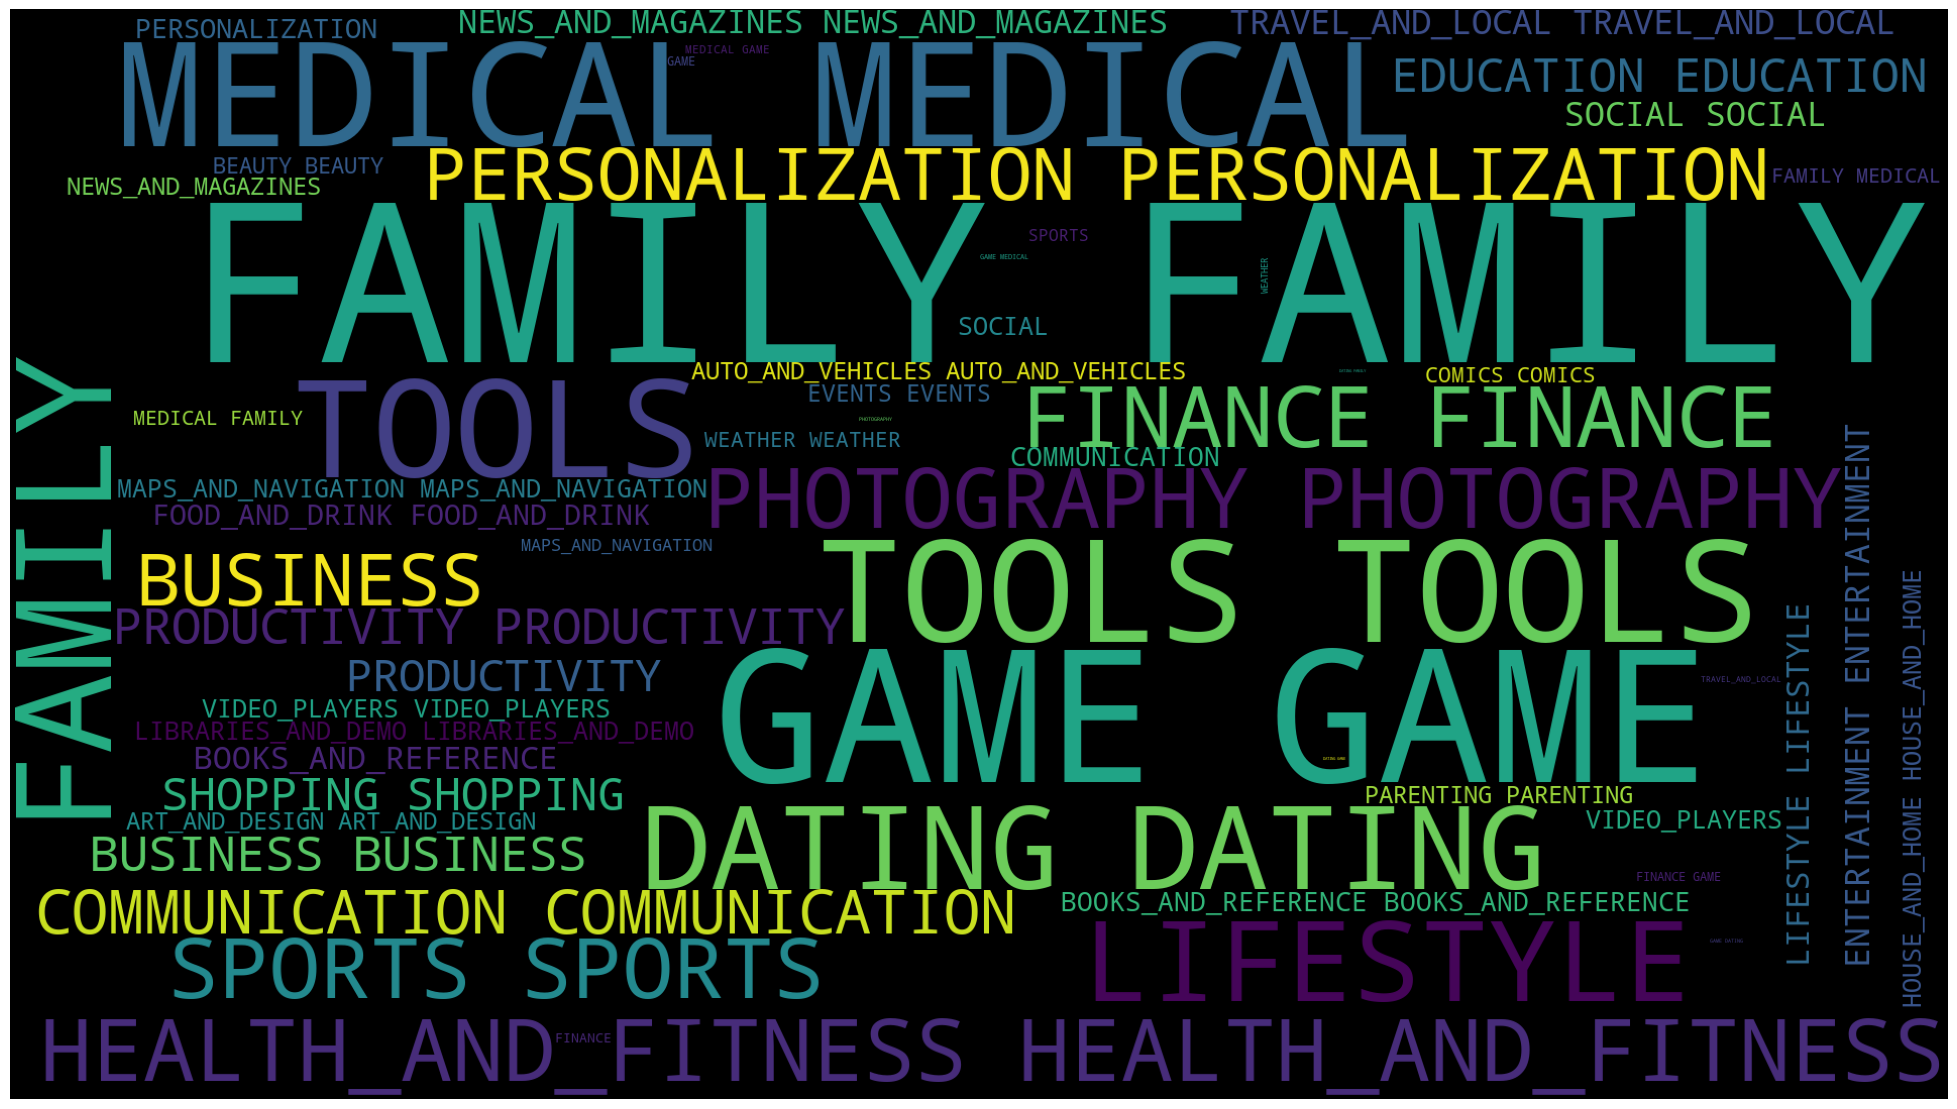

In [49]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Analisis de Category vs Rating

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'MEDICAL'),
  Text(1, 0, 'HEALTH_AND_FITNESS'),
  Text(2, 0, 'TRAVEL_AND_LOCAL'),
  Text(3, 0, 'FINANCE'),
  Text(4, 0, 'FAMILY'),
  Text(5, 0, 'LIFESTYLE'),
  Text(6, 0, 'PERSONALIZATION'),
  Text(7, 0, 'TOOLS'),
  Text(8, 0, 'BUSINESS'),
  Text(9, 0, 'PRODUCTIVITY'),
  Text(10, 0, 'COMMUNICATION'),
  Text(11, 0, 'LIBRARIES_AND_DEMO'),
  Text(12, 0, 'GAME'),
  Text(13, 0, 'SOCIAL'),
  Text(14, 0, 'SHOPPING'),
  Text(15, 0, 'SPORTS'),
  Text(16, 0, 'FOOD_AND_DRINK'),
  Text(17, 0, 'EVENTS'),
  Text(18, 0, 'DATING'),
  Text(19, 0, 'BOOKS_AND_REFERENCE'),
  Text(20, 0, 'PHOTOGRAPHY'),
  Text(21, 0, 'NEWS_AND_MAGAZINES'),
  Text(22, 0, 'COMICS'),
  Text(23, 0, 'PARENTING'),
  Text(24, 0, 'ART_AND_DESIGN'),
  Text(25, 0, 'AUTO_AND_VEHICLES'),
  Text(26, 0, 'MAPS_AND_NAVIGATION'),
  Text(27, 0, 'VIDEO_PLAYERS'),
  Text(28, 0, 'EDU

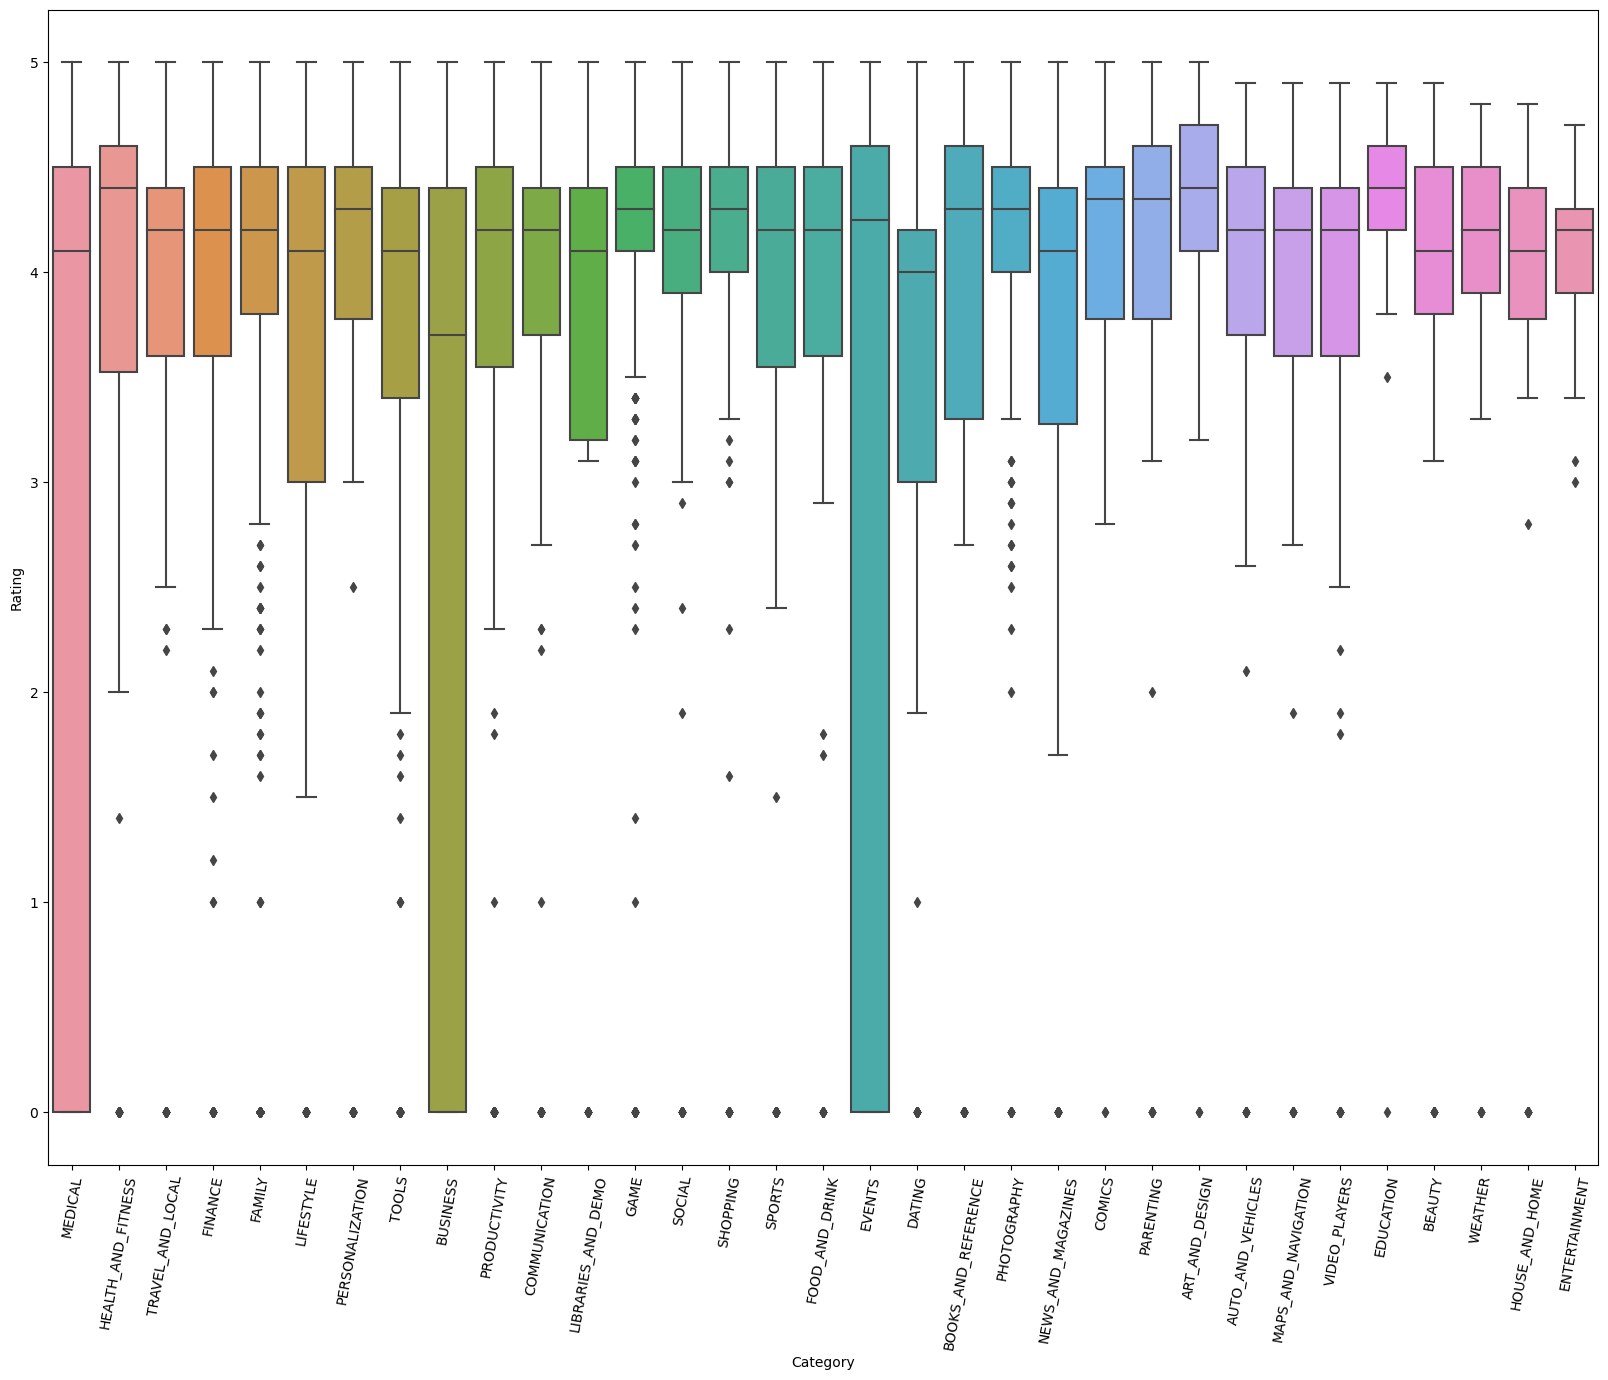

In [50]:
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Category',data = df.sort_values('Rating',ascending=False))
plt.xticks(rotation=80)

### Columna "Type"

In [51]:
df['Type'].value_counts()

Type
Free    9591
Paid     765
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, 'Free'), Text(1, 0, 'Paid')])

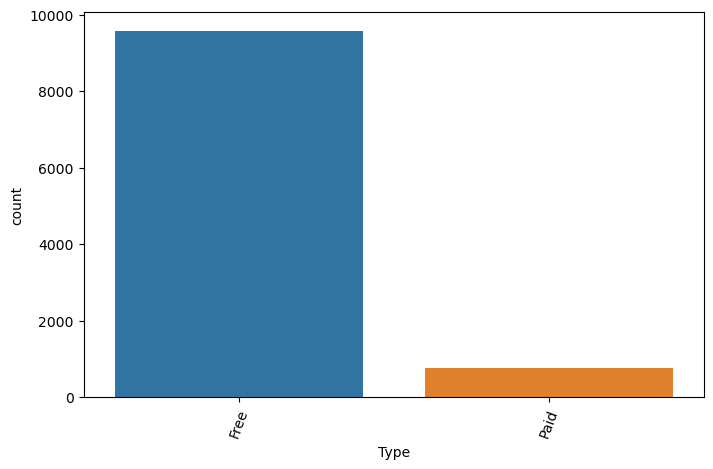

In [52]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x='Type',data=df)
plt.xticks(rotation=70)

<Axes: ylabel='count'>

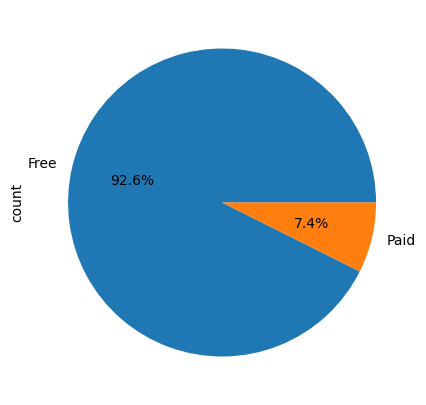

In [53]:
df["Type"].value_counts().plot.pie(autopct = "%1.1f%%")

### Analisis "Type" vs "Rating"

<Figure size 1500x800 with 0 Axes>

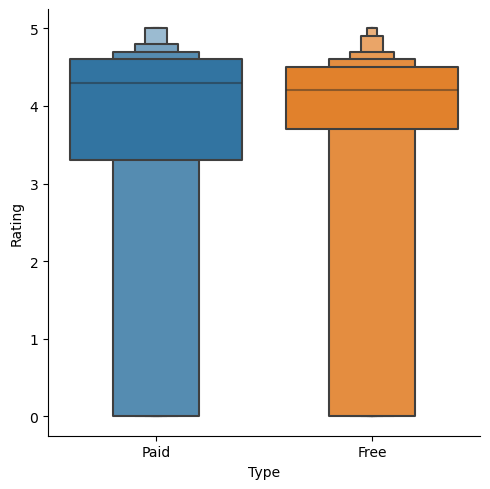

In [54]:
plt.figure(figsize=(15,8))
sns.catplot(y='Rating',x='Type',data = df.sort_values('Rating',ascending=False),kind='boxen')

### Columna "Content Rating "

In [55]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8381
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

### Analisis: "Content Rating vs Rating"

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Mature 17+'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Teen'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

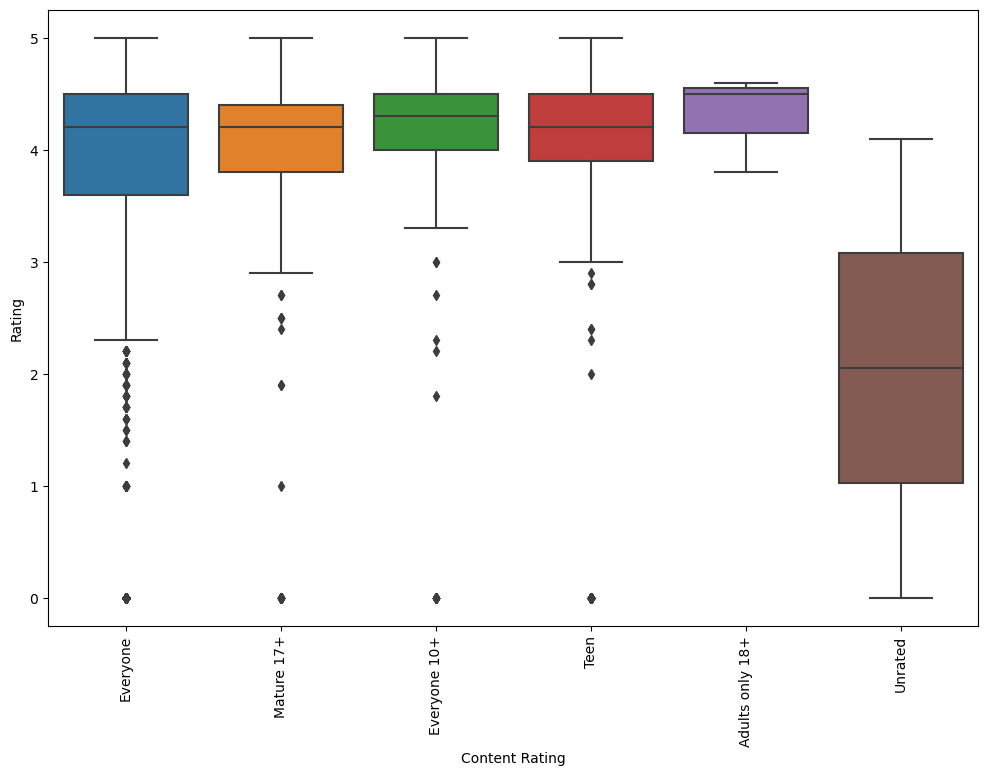

In [56]:
plt.figure(figsize=(12,8))
sns.boxplot(y='Rating',x='Content Rating',data = df.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)

<Axes: xlabel='Content Rating', ylabel='Installs'>

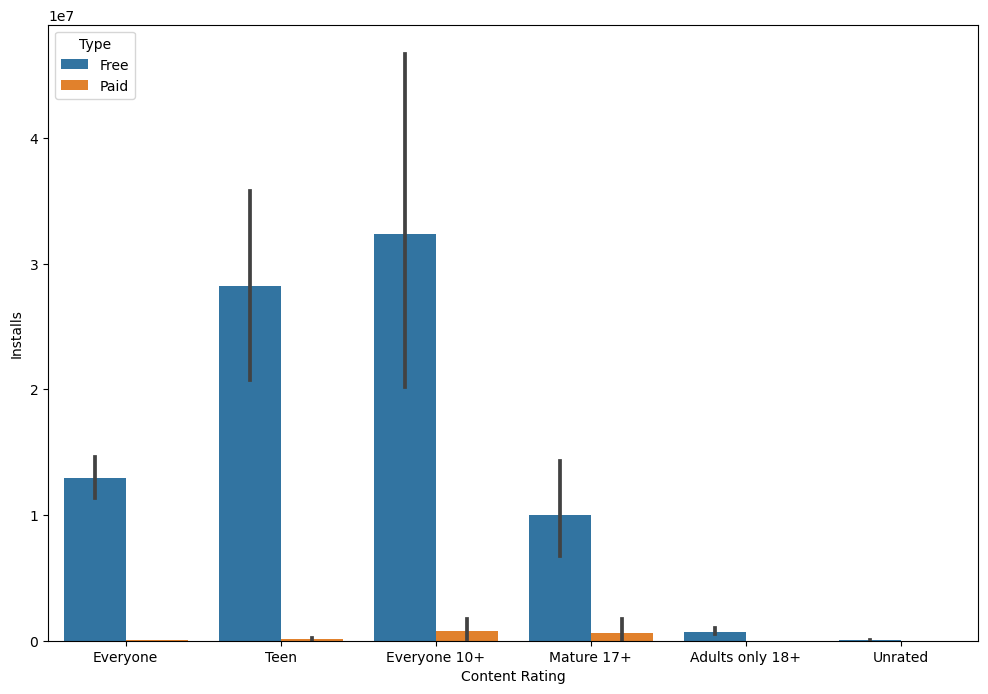

In [57]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=df)

### Columna "Genres" (Generos)

In [58]:
df['Genres'].value_counts()

Genres
Tools                                841
Entertainment                        588
Education                            527
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: count, Length: 119, dtype: int64

### Columna Version Actual (Current ver)

In [59]:
df['Current Ver'].value_counts()

Current Ver
Varies with device    1302
1.0                    802
1.1                    260
1.2                    177
2.0                    149
                      ... 
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
7.1.34.28                1
2.0.148.0                1
Name: count, Length: 2831, dtype: int64

### Columna Android Ver

In [60]:
df['Android Ver'].value_counts()


Android Ver
4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1337
Varies with device    1221
4.4 and up             893
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [61]:
# Function to create a scatter plot
def scatters(col1, col2):
    # Crear un scatter plot usando seaborn
    plt.figure(figsize=(10, 6))  # Ajustar a gusto
    sns.scatterplot(data=df, x=col1, y=col2, hue="Type")
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

# Función para crear un gráfico KDE
def kde_plot(feature):
    # Crear un FacetGrid para KDE parcelas utilizando Seaborn
    grid = sns.FacetGrid(df, hue="Type", aspect=2)

    # Trazar parcelas KDE para la característica especificada
    grid.map(sns.kdeplot, feature)

    # Añadir una leyenda para distinguir las categorías
    grid.add_legend()

**Los KDE plots (Kernel Density Estimation plots) son una herramienta útil para visualizar la distribución de datos en una o más dimensiones**

### Analisis de los KDE Plot

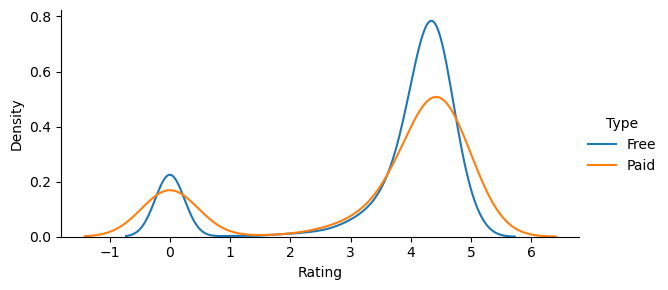

In [62]:
kde_plot('Rating')

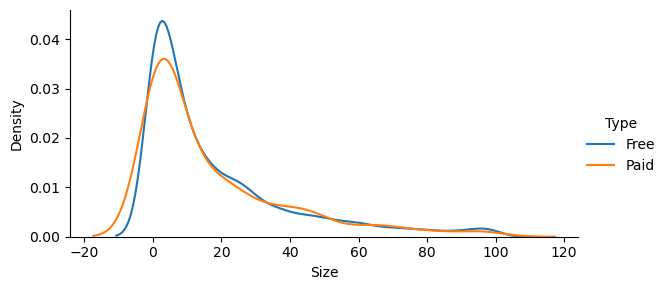

In [63]:
kde_plot('Size')

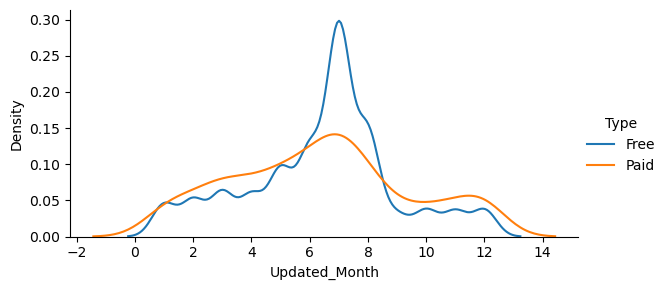

In [64]:
kde_plot('Updated_Month')

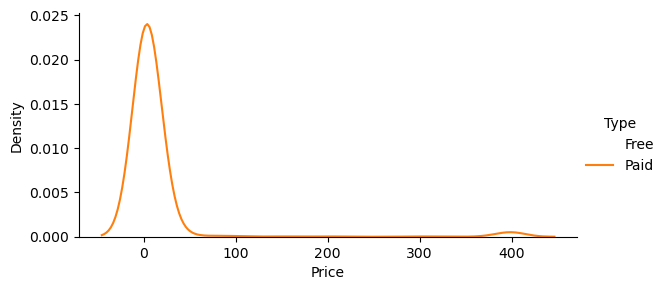

In [65]:
kde_plot('Price')

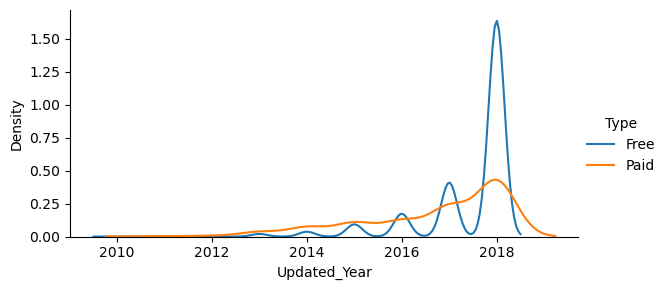

In [66]:
kde_plot('Updated_Year')

### Analisis de los Scatter Plot

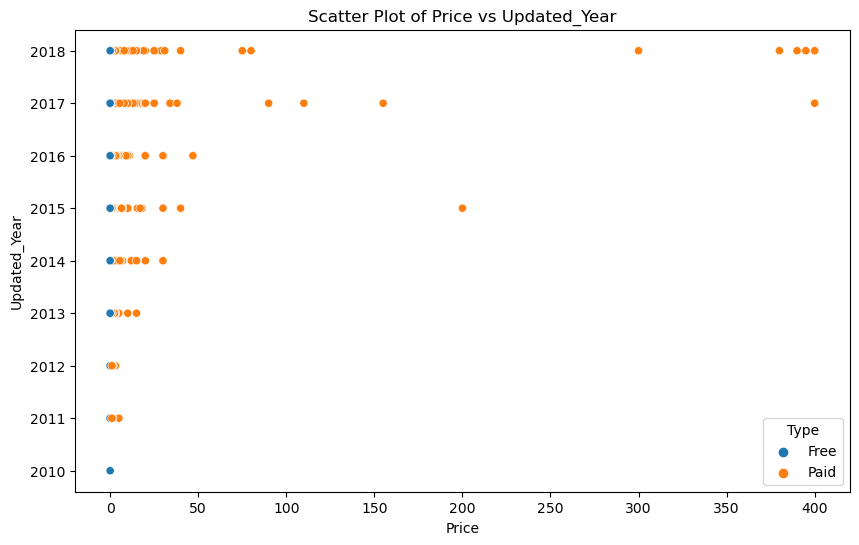

In [67]:
scatters('Price', 'Updated_Year')

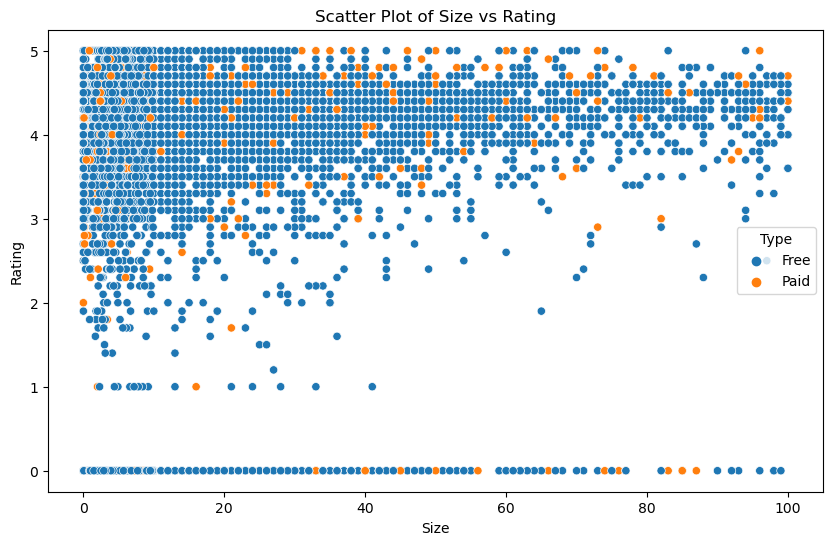

In [68]:
scatters('Size', 'Rating')

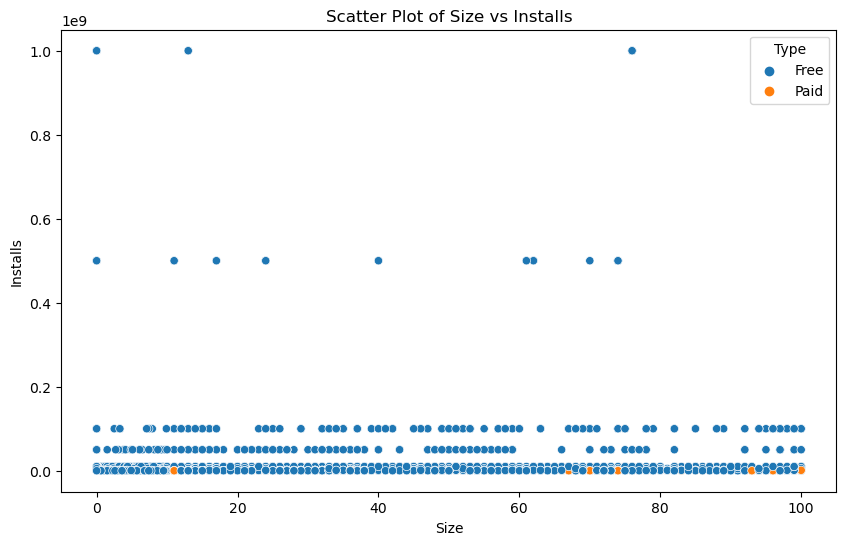

In [69]:
scatters('Size', 'Installs')

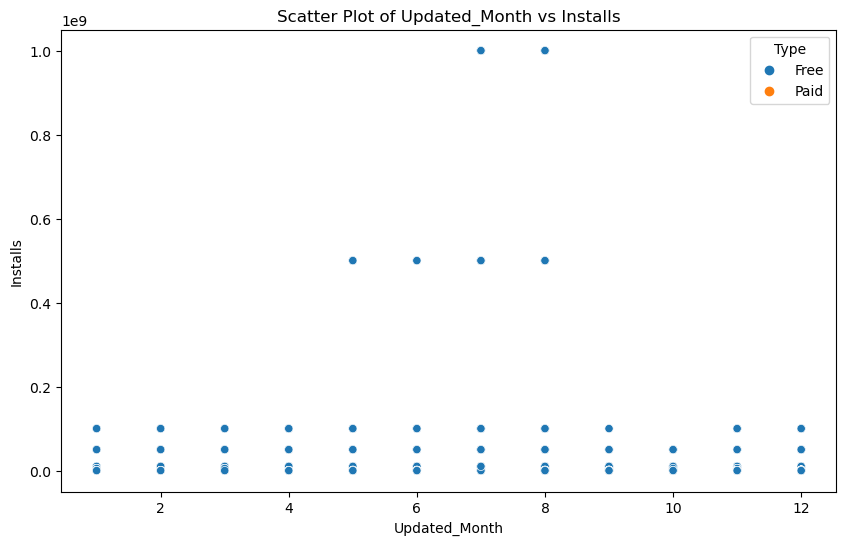

In [70]:
scatters('Updated_Month', 'Installs')

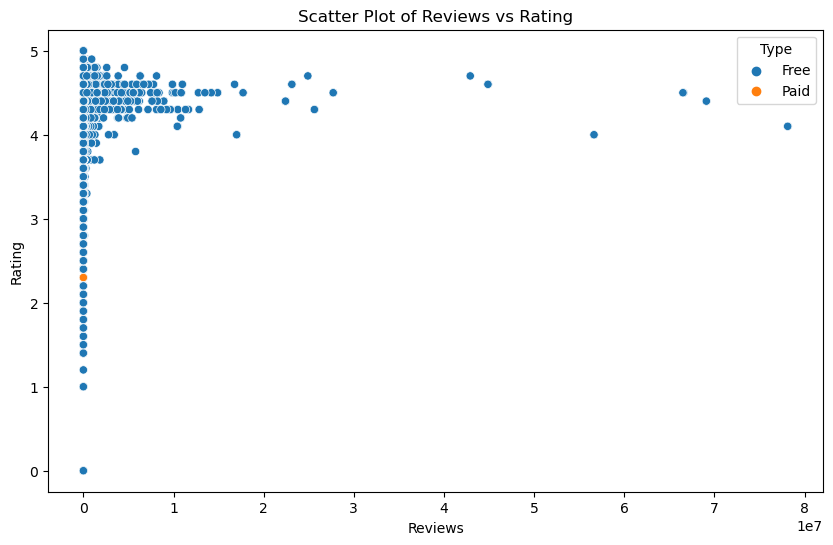

In [71]:
scatters('Reviews', 'Rating')

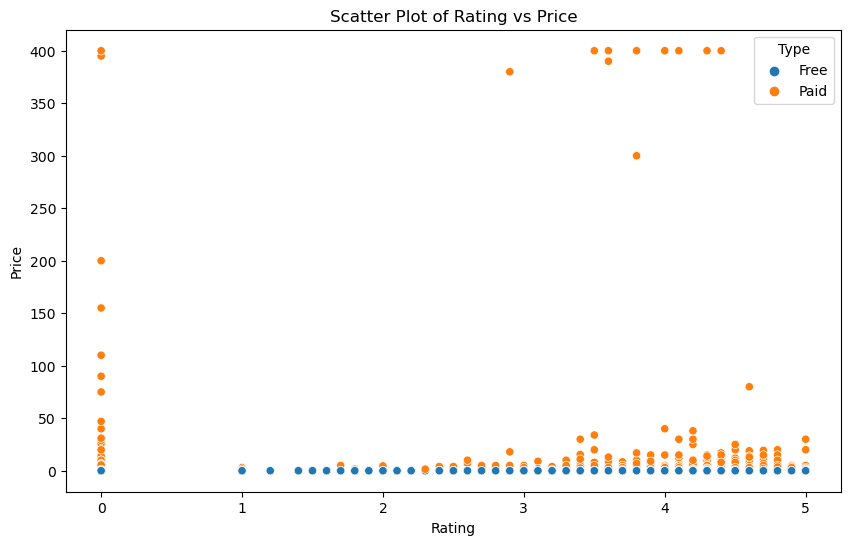

In [72]:
scatters('Rating', 'Price')

## Otros Analisis

### Apps con 5* de Rating

In [73]:
df_rating_5 = df[df.Rating == 5.]
print(f'There are {df_rating_5.shape[0]} apps having rating of 5.0')

There are 271 apps having rating of 5.0


### Installs

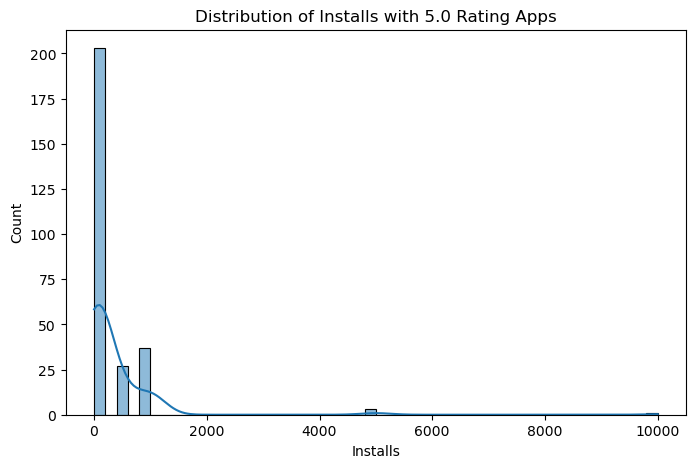

In [74]:
sns.histplot(data=df_rating_5, x='Installs', kde=True, bins=50)

plt.title('Distribution of Installs with 5.0 Rating Apps')
plt.show()

**A pesar de las puntuaciones, el número de instalaciones de la mayoría de las aplicaciones es bajo. Por tanto, no pueden considerarse los mejores.**

### Reviews

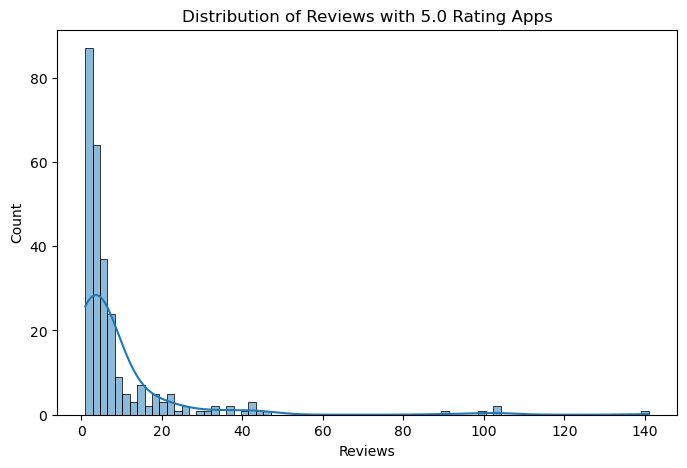

In [75]:
sns.histplot(data=df_rating_5, x='Reviews', kde=True)
plt.title('Distribution of Reviews with 5.0 Rating Apps')
plt.show()

**La distribución está sesgada a la derecha, lo que indica que las aplicaciones con pocas reseñas tienen valoraciones de 5,0, lo que es engañoso.**

### Category

In [76]:
df_rating_5_cat =  df_rating_5['Category'].value_counts().reset_index()

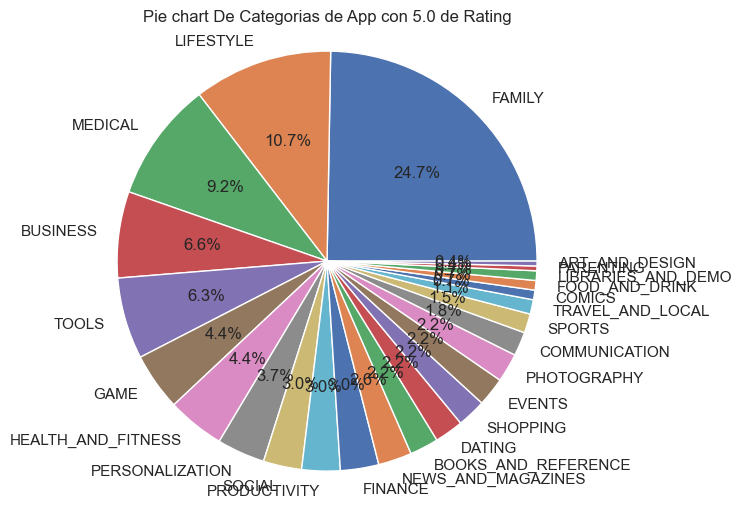

In [77]:
# Create a pie chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.pie(df_rating_5_cat.iloc[:, 1], labels=df_rating_5_cat.iloc[:, 0], autopct='%1.1f%%')
plt.title('Pie chart De Categorias de App con 5.0 de Rating')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

**Las aplicaciones de Family, LifeStyle y Mecial son las que reciben más puntuaciones de 5,0 en Google Play Store, representando Family aproximadamente la cuarta parte del total.**

### Type

In [78]:
df_rating_5_type =  df_rating_5['Type'].value_counts().reset_index()

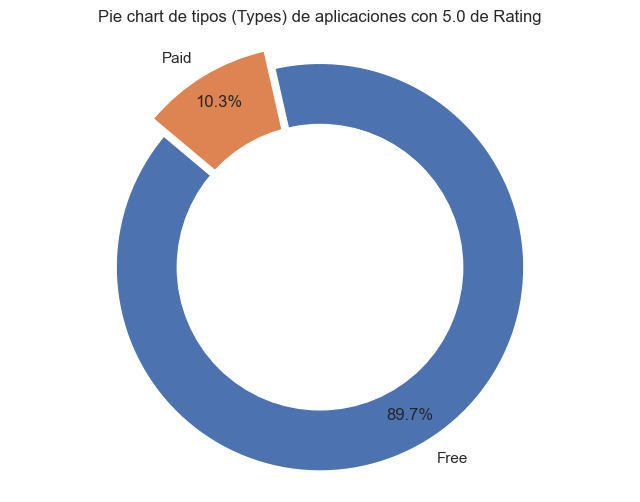

In [79]:
# Create a pie chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Datos para el pie chart
sizes = df_rating_5_type.iloc[:, 1]
labels = df_rating_5_type.iloc[:, 0]

# Saca un trozo explotándolo
explode = (0, 0.1) # Ajusta el segundo valor para controlar la distancia de extracción

# Crear pie chart con colores por defecto
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explode)

# Dibuja un círculo en el centro para que parezca un gráfico de rosquilla
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Una relación de aspecto igual garantiza que la tarta se dibuje como un círculo.
plt.axis('equal')

# Title
plt.title('Pie chart de tipos (Types) de aplicaciones con 5.0 de Rating')

# Show the pie chart
plt.show() 


**Casi el 90% de las aplicaciones con calificación 5.0 son gratuitas en Goolge Play Store.**

Text(0.5, 1.0, 'Gráfico de series temporales de Last Update')

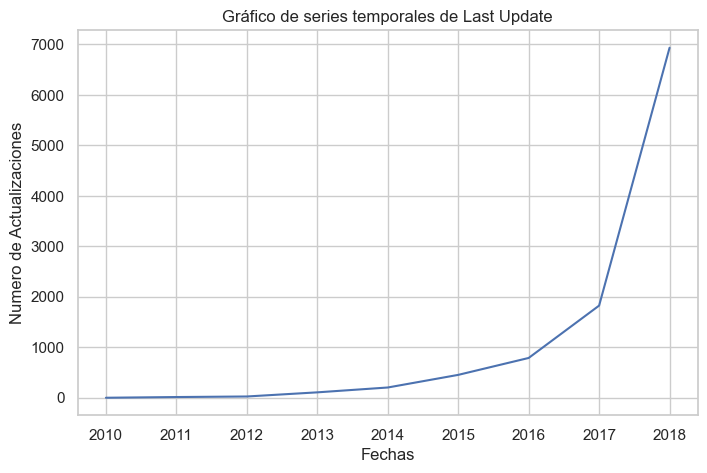

In [80]:
freq= pd.Series()
freq=df['Updated_Year'].value_counts()
freq.plot()
plt.xlabel("Fechas")
plt.ylabel("Numero de Actualizaciones")
plt.title("Gráfico de series temporales de Last Update")

## Pruning de Caracteristicas

Decidimos eliminar las siguientes características:

* App : Los nombres de las aplicaciones no tienen valor para el modelo
* Géneros : La información que almacena es la misma que la característica Categoría.
* Versión actual: La versión actual de una aplicación no tiene un valor significativo.
* Android Ver: La versión de Android de una aplicación no tiene valor significativo.

In [81]:
pruned_features = ['App', 'Genres', 'Current Ver', 'Android Ver']

# 6. División de datos para la modelización
* Dividimos el conjunto de datos en un 80% de entrenamiento y un 20% de prueba.

In [82]:
target = 'Rating'

In [83]:
X = df.copy().drop(pruned_features+[target], axis=1)
y = df.copy()[target]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Codificación de etiquetas

In [85]:
le_dict = defaultdict()


In [86]:
features_to_encode = X_train.select_dtypes(include=['category', 'object']).columns

for col in features_to_encode:
    le = LabelEncoder()

    X_train[col] = le.fit_transform(X_train[col]) # Ajuste y transformación de los datos de entrenamiento
    X_train[col] = X_train[col].astype('category') # Conversión de las características codificadas en etiquetas de tipo numérico a categórico en pandas
    X_test[col] = le.transform(X_test[col]) # Transformar sólo los datos de prueba
    X_test[col] = X_test[col].astype('category') # Convertir las características codificadas en etiquetas de numéricas a categóricas dtype in pandas
    le_dict[col] = le # Guardar el codificador de etiquetas para características individuales

## Estandarizacion

In [87]:
# Conversión y adición de «Last Updated Month» a características categóricas
categorical_features = features_to_encode + ['Updated_Month']
X_train['Updated_Month'] = X_train['Updated_Month'].astype('category')
X_test['Updated_Month'] = X_test['Updated_Month'].astype('category')

# Listado de características numéricas a escala
numeric_features = X_train.select_dtypes(exclude=['category', 'object']).columns

In [88]:
numeric_features

Index(['Reviews', 'Size', 'Installs', 'Price', 'Updated_Year'], dtype='object')

In [89]:
scaler = StandardScaler()

# Ajuste y transformación de los datos
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
# X_train = scaler.fit_transform(X_train)

# Transformar sólo los datos de prueba
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
# X_test = scaler.transform(X_test)

# 7. Modelado

## 7.1 Regresion

* Crear un dataframe para las metricas

In [90]:
models = ['Linear', 'KNN', 'Random Forest']
datasets = ['train', 'test']
metrics = ['RMSE', 'MAE', 'R2']

multi_index = pd.MultiIndex.from_product([models, datasets, metrics],
                                         names=['model', 'dataset', 'metric'])

df_metrics_reg = pd.DataFrame(index=multi_index,
                          columns=['value'])

In [91]:
df_metrics_reg

value
model         dataset metric      
Linear        train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
KNN           train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
Random Forest train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN

### Linear Regressor

In [92]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [93]:
df_metrics_reg.loc['Linear', 'train', 'R2'] = lr.score(X_train, y_train)
df_metrics_reg.loc['Linear', 'test', 'R2'] = lr.score(X_test, y_test)

In [94]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

df_metrics_reg.loc['Linear', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Linear', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Linear', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Linear', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

  ### KNeighbors Regressor

In [95]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [96]:
df_metrics_reg.loc['KNN', 'train', 'R2'] = knn.score(X_train, y_train)
df_metrics_reg.loc['KNN', 'test', 'R2'] = knn.score(X_test, y_test)

In [97]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

df_metrics_reg.loc['KNN', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['KNN', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['KNN', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['KNN', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

### Random Forest Regressor

In [98]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [99]:
df_metrics_reg.loc['Random Forest', 'train', 'R2'] = rf.score(X_train, y_train)
df_metrics_reg.loc['Random Forest', 'test', 'R2'] = rf.score(X_test, y_test)

In [100]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

df_metrics_reg.loc['Random Forest', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Random Forest', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Random Forest', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Random Forest', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

### Regression Evaluation

In [101]:
# Rounding the values

df_metrics_reg['value'] = df_metrics_reg['value'].apply(lambda v: round(v, ndigits=3))
df_metrics_reg

value
model         dataset metric       
Linear        train   RMSE    1.518
                      MAE     1.101
                      R2      0.025
              test    RMSE    1.520
                      MAE     1.098
                      R2      0.026
KNN           train   RMSE    1.246
                      MAE     0.838
                      R2      0.343
              test    RMSE    1.565
                      MAE     1.064
                      R2     -0.032
Random Forest train   RMSE    1.015
                      MAE     0.616
                      R2      0.564
              test    RMSE    1.037
                      MAE     0.628
                      R2      0.547

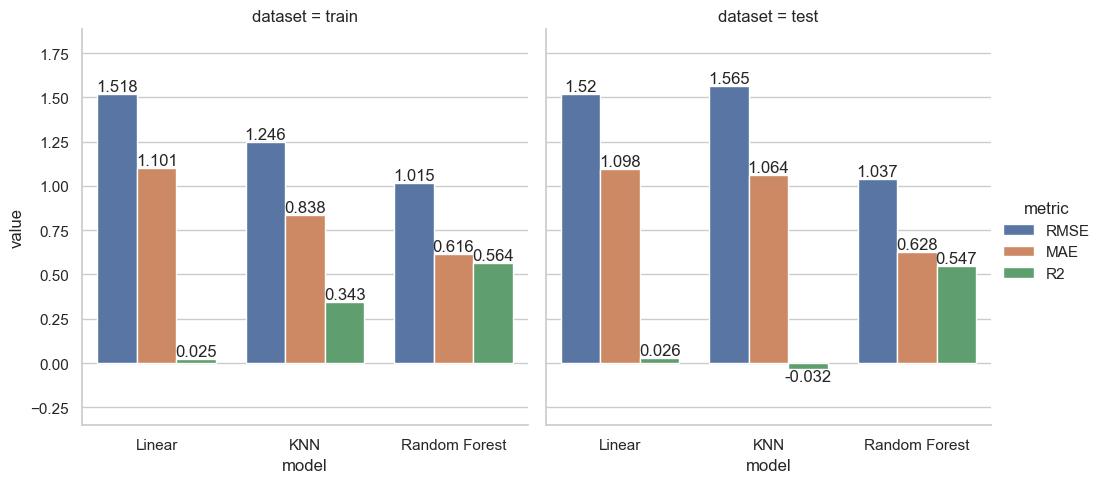

In [102]:
data = df_metrics_reg.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='value', hue='metric')

# Añadir anotaciones a las barras
# iterar a través de los ejes
for ax in g.axes.ravel():
    # añadir anotaciones
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()

* Las predicciones de regresión no se sostienen muy bien.

* **Podemos interpretar que el conjunto de datos no es adecuado para el problema de regresión.**

## 7.2 Clasificacion

* **Enmarquémoslo como el enunciado de un problema de clasificación.**

* **Convertir la Clasificación de continua a discreta.**

In [103]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

  ### Creando DataFrame para las metricas

In [104]:
models = ['Logistic Regression', 'KNN', 'Random Forest']
datasets = ['train', 'test']

multi_index = pd.MultiIndex.from_product([models, datasets],
                                         names=['model', 'dataset'])

df_metrics_clf = pd.DataFrame(index=multi_index,
                          columns=['accuracy %'])

In [105]:
df_metrics_clf

accuracy %
model               dataset           
Logistic Regression train          NaN
                    test           NaN
KNN                 train          NaN
                    test           NaN
Random Forest       train          NaN
                    test           NaN


### Clasificador de regresión logística

In [106]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train_int)

LogisticRegression()

In [107]:
df_metrics_clf.loc['Logistic Regression', 'train'] = lr_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Logistic Regression', 'test'] = lr_clf.score(X_test, y_test_int)

  ### KNeighbors Classifier

In [108]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_int)

KNeighborsClassifier()

In [109]:
df_metrics_clf.loc['KNN', 'train'] = knn_clf.score(X_train, y_train_int)
df_metrics_clf.loc['KNN', 'test'] = knn_clf.score(X_test, y_test_int)

 
### Random Forest Classifier

In [110]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train_int)

RandomForestClassifier()

In [111]:
df_metrics_clf.loc['Random Forest', 'train'] = rf_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Random Forest', 'test'] = rf_clf.score(X_test, y_test_int)

   
### Classification Evaluation

In [112]:
# Redondear y convertir las precisiones en porcentajes
df_metrics_clf['accuracy %'] = df_metrics_clf['accuracy %'].apply(lambda v: round(v*100, ndigits=2))
df_metrics_clf

accuracy %
model               dataset            
Logistic Regression train         64.82
                    test          62.69
KNN                 train         71.44
                    test          57.67
Random Forest       train        100.00
                    test          73.31

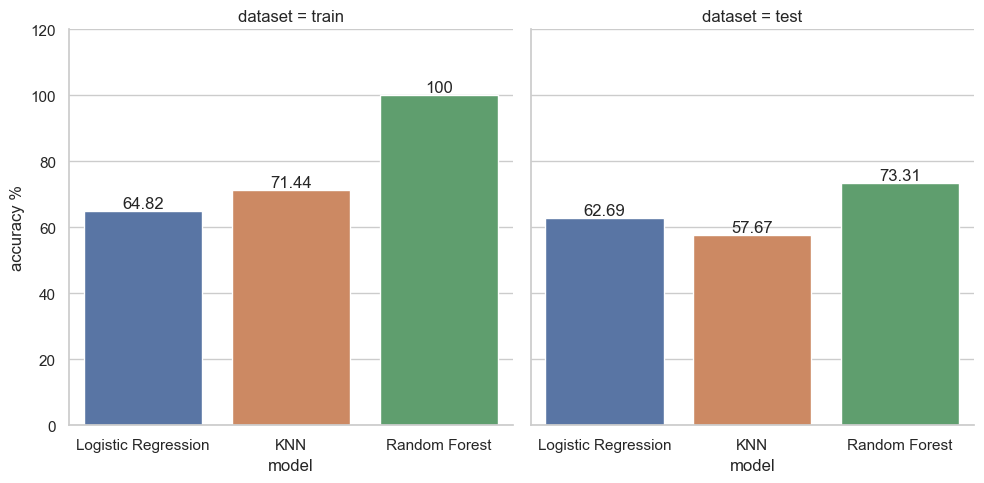

In [113]:
data = df_metrics_clf.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='accuracy %')

# Añadir anotaciones a las barras
# iterar a través de los ejes
for ax in g.axes.ravel():
    # añadir anotaciones
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()

**Después de comparar con modelos de regresión, está claro que obtendríamos mejores resultados con la clasificación.**

<a id="monetary"></a>
## </span><span style='color:#ff6200'> Conclusion</span></b>

* Vease Conlcusion de "Lab 2 - Sin Nulls"